## **R.CHANDU BNM**
## **AP24122060018**

1)Write a program that adds salt-and-pepper noise to an image with a given
probability for both salt and pepper. Experiment with different noise levels and
visually inspect how the image quality changes.

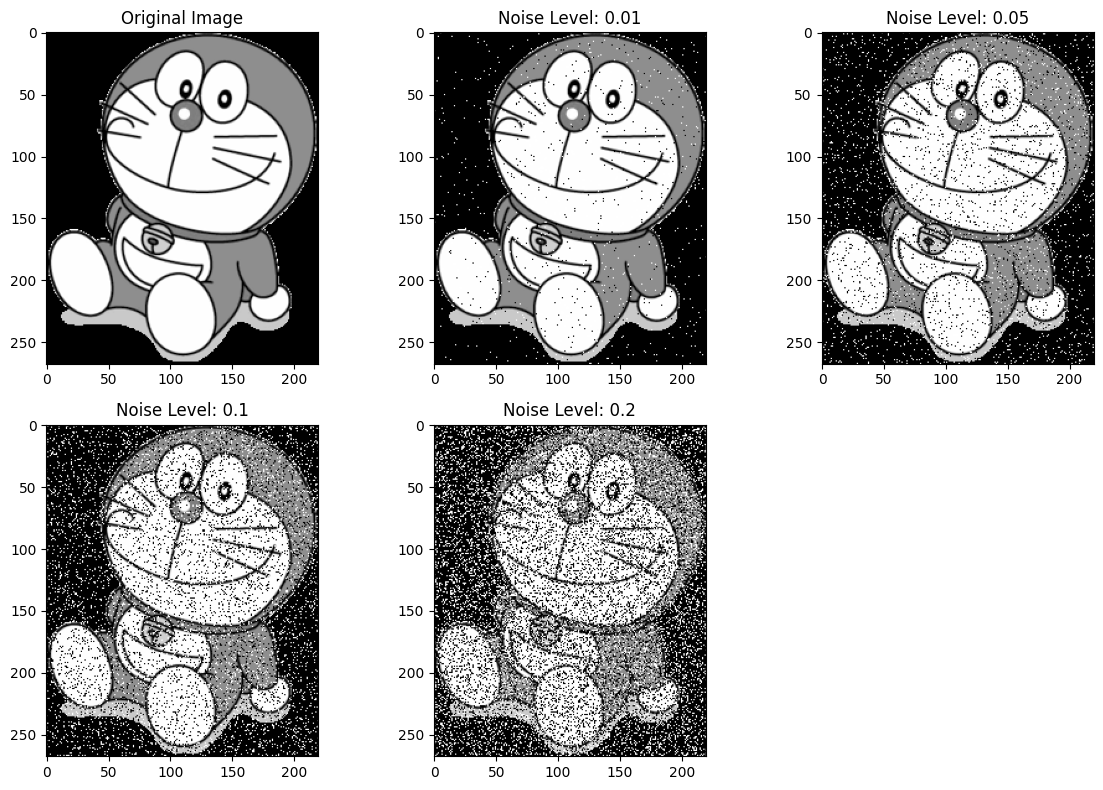

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = image.copy()
    rows, cols = noisy_image.shape[:2]

    for i in range(rows):
        for j in range(cols):
            random_value = np.random.rand()

            if random_value < salt_prob:
                noisy_image[i, j] = 255  # Salt (white)
            elif random_value > (1 - pepper_prob):
                noisy_image[i, j] = 0    # Pepper (black)

    return noisy_image

image = cv2.imread("Doraemon.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not open or read the image.")
else:
    # with different noise levels
    noise_levels = [0.01, 0.05, 0.1, 0.2]

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")

    for i, noise_level in enumerate(noise_levels):
        noisy_img = add_salt_pepper_noise(image, noise_level, noise_level)
        plt.subplot(2, 3, i + 2)
        plt.imshow(noisy_img, cmap="gray")
        plt.title(f"Noise Level: {noise_level}")

    plt.tight_layout()
    plt.show()


2)Write a program that adds salt-and-pepper noise to an image with a specified
probability (for both salt and pepper). Analyze how this noise affects the
image's quality using metrics like Peak Signal-to-Noise Ratio (PSNR) and Mean
Squared Error (MSE).

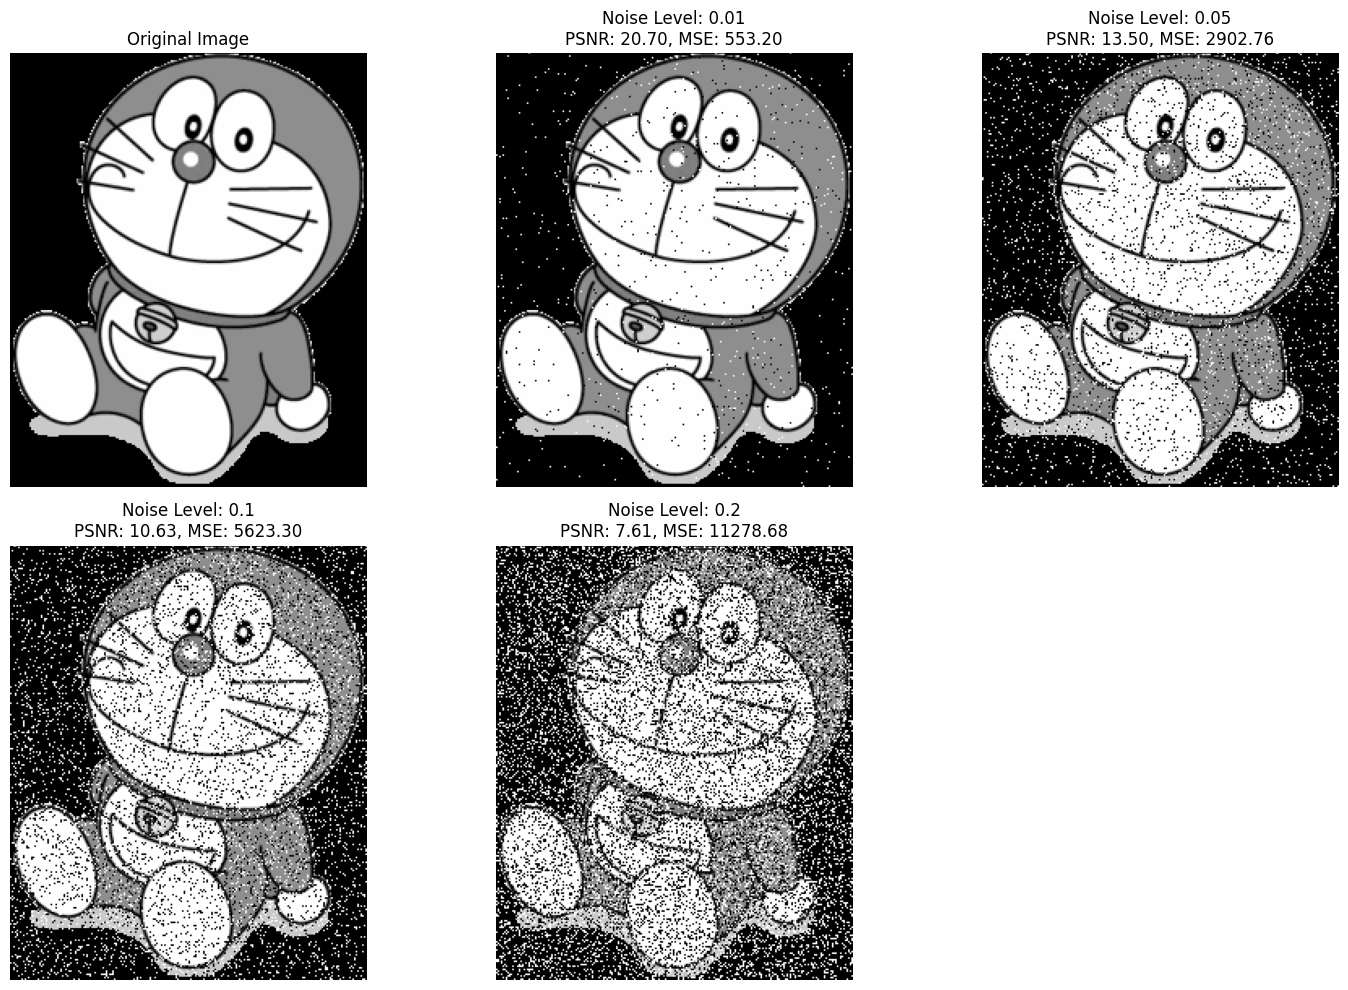

Noise Level	PSNR	MSE
-----------------------------------
0.01		20.70	553.20
0.05		13.50	2902.76
0.10		10.63	5623.30
0.20		7.61	11278.68


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse


def add_salt_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = image.copy()
    rows, cols = noisy_image.shape

    # Loop over each pixel and add noise based on the probabilities
    for i in range(rows):
        for j in range(cols):
            random_value = np.random.rand()

            if random_value < salt_prob:
                noisy_image[i, j] = 255  # Salt (white)
            elif random_value > (1 - pepper_prob):
                noisy_image[i, j] = 0    # Pepper (black)

    return noisy_image


# Load the image in grayscale. so that it can appear clearly
image = cv2.imread("Doraemon.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not open or read the image.")
else:
    # Different noise levels to experiment with
    noise_levels = [0.01, 0.05, 0.1, 0.2]

    # Create a figure to display original and noisy images
    plt.figure(figsize=(15, 10))

    # Show the original image in the first subplot
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # List to store PSNR and MSE values for each noise level
    results = []

    # Loop through each noise level, add noise, and calculate PSNR and MSE
    for i, noise_level in enumerate(noise_levels):
        noisy_img = add_salt_pepper_noise(image, noise_level, noise_level)

        # Calculate PSNR and MSE
        psnr_value = psnr(image, noisy_img)
        mse_value = mse(image, noisy_img)
        results.append((noise_level, psnr_value, mse_value))

        # Display the noisy image
        plt.subplot(2, 3, i + 2)
        plt.imshow(noisy_img, cmap="gray")
        plt.title(f"Noise Level: {noise_level}\nPSNR: {psnr_value:.2f}, MSE: {mse_value:.2f}")
        plt.axis("off")

    # Adjust layout to avoid overlap of subplots
    plt.tight_layout()
    plt.show()

    # Print PSNR and MSE values in a tabular format
    print("Noise Level\tPSNR\tMSE")
    print("-----------------------------------")
    for noise_level, psnr_value, mse_value in results:
        print(f"{noise_level:.2f}\t\t{psnr_value:.2f}\t{mse_value:.2f}")


3)Write a program that allows a user to define a 3 X 3 convolution kernel and
apply it to an image. The program should take user input for 9 kernel elements,
perform the convolution operation, and display the resulting image. Analyze
how different kernels (eg., identity, blur, sharpen) affect the image.

Enter the 9 elements of the 3x3 convolution kernel (row by row):
Element 1: 1
Element 2: 0
Element 3: 1
Element 4: 1
Element 5: 1
Element 6: 0
Element 7: 0.5
Element 8: 1
Element 9: 0.4


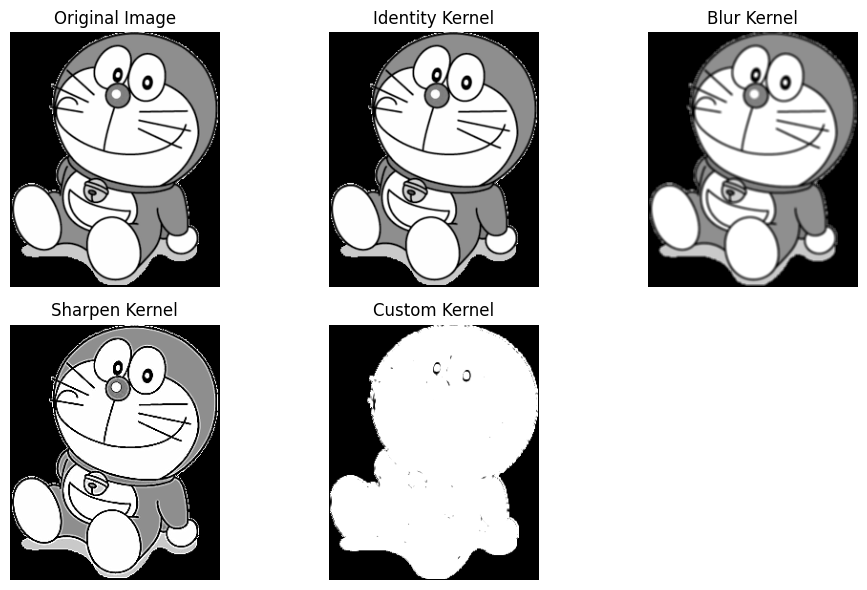

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the convolution
def apply_convolution(image, kernel):
    # Apply the convolution using cv2.filter2D
    result = cv2.filter2D(image, -1, kernel)
    return result

# Function to get user input for a 3x3 kernel
def get_user_kernel():
    print("Enter the 9 elements of the 3x3 convolution kernel (row by row):")
    kernel = []
    for i in range(9):
        element = float(input(f"Element {i + 1}: "))
        kernel.append(element)
    return np.array(kernel).reshape((3, 3))

# Predefined kernels for comparison
kernels = {
    'Identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    'Blur': np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
}

# Load the image
image = cv2.imread('Doraemon.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not open or read the image.")
else:
    # Display the original image
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Apply and display predefined kernels
    for i, (name, kernel) in enumerate(kernels.items()):
        result_image = apply_convolution(image, kernel)
        plt.subplot(2, 3, i + 2)
        plt.imshow(result_image, cmap='gray')
        plt.title(f"{name} Kernel")
        plt.axis('off')

    # Get user input for a custom kernel
    user_kernel = get_user_kernel()

    # Apply the user-defined kernel
    custom_result = apply_convolution(image, user_kernel)

    # Display the result of the user-defined kernel
    plt.subplot(2, 3, len(kernels) + 2)
    plt.imshow(custom_result, cmap='gray')
    plt.title('Custom Kernel')
    plt.axis('off')

    # Show the plots
    plt.tight_layout()
    plt.show()
